In [238]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import pickle


# **Data Understanding**

In [239]:
# Load csv dataset
df = pd.read_csv("/content/ADHD.csv", encoding='ISO-8859-1')

In [240]:
df.head()

,age,sex,specify,home_language,have_you_ever_experienced_any_mental_health_difficulties_or_symptoms_before_starting_university_e_g_in_primary_or_high_school,if_yes_please_list_these_difficulties_and_or_symptoms,if_you_have_ever_experienced_difficulties_and_or_symptoms_of_a_mental_illness_how_old_were_you_when_this_started,have_you_ever_been_diagnosed_with_a_mental_illness,if_you_have_been_diagnosed_formally_or_informally_please_list_the_diagnosis_diagnoses,was_this_diagnosis_made_before_or_after_you_left_high_school,if_you_have_been_diagnosed_with_a_mental_illness_at_what_age_was_this,have_you_ever_used_prescribed_psychiatric_medication_for_a_mental_illness_or_symptoms_of_one,are_you_currently_using_prescribed_psychiatric_medication_for_a_mental_illness_or_symptoms_of_one,have_you_ever_been_to_therapy_or_counselling_for_a_mental_illness_or_symptoms_of_one,are_you_currently_in_therapy_or_counselling_for_a_mental_illness_or_symptoms_of_one,bdi1_item_1,bdi1_item_2,bdi1_item_3,bdi1_item_4,bdi1_item_5,bdi1_item_6,bdi1_item_7,bdi1_item_8,bdi1_item_9,bdi1_item_10,bdi1_item_11,bdi1_item_12,bdi1_item_13,bdi1_item_14,bdi1_item_15,bdi1_item_16,bdi1_item_17,bdi1_item_18,bdi1_item_19,bdi1_item_20,bdi1_item_21,bdi1_total,audit1_item_1,audit1_item_2,audit1_item_3,audit1_item_4,audit1_item_5,audit1_item_6,audit1_item_7,audit1_item_8,audit1_item_9,audit1_total,aas1_item_1,aas1_item_2,aas1_item_3,aas1_item_4,aas1_item_5,aas1_item_6,aas1_item_7,aas1_item_8,aas1_item_9,aas1_total,psy1004_grade,nbt_completed,nbt_year,nbt_al,nbt_math,nbt_ql,nbt_ave,nbt_did_math,nbt_alql_ave,matric_mark,asrs1_item_1,asrs1_item_2,asrs1_item_3,asrs1_item_4,asrs1_item_5,asrs1_item_6,asrs1_item_7,asrs1_item_8,asrs1_item_9,asrs1_item_10,asrs1_item_11,asrs1_item_12,asrs1_item_13,asrs1_item_14,asrs1_item_15,asrs1_item_16,asrs1_item_17,asrs1_item_18,asrs1_total.x,bai1_item_1,bai1_item_2,bai1_item_3,bai1_item_4,bai1_item_5,bai1_item_6,bai1_item_7,bai1_item_8,bai1_item_9,bai1_item_10,bai1_item_11,bai1_item_12,bai1_item_13,bai1_item_14,bai1_item_15,bai1_item_16,bai1_item_17,bai1_item_18,bai1_item_19,bai1_item_20,bai1_item_21,bai1_total,asrs1_total.y,aas_change,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114
0,22,female,NaN,xitsonga,no,na,na,no,na,not applicable,na,not applicable,not applicable,not applicable,not applicable,3,0,0,1,2,3,1,2,0,1,0,3,0,0,2,1,0,3,0,2,0,24,0,0,0,0,0,0,0,0,0,0,2.0,4.0,5.0,2.0,3.0,1.0,5.0,5,5.0,32,65,yes,2022,57,67,44,56,yes,50.5,84,1,1,1,2,0,0,1,3,2,1,3,0,2,0,1,0,0,1,19,2,3,1,3,3,3,3,3,3,3,1,1,1,3,0,0,3,1,3,1,3,44,44.0,-0.112652,NaN,NaN,NaN,NaN,NaN
1,21,male,NaN,english,no,none,none,no,none,not applicable,none,not applicable,not applicable,not applicable,not applicable,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,5,2,1,1,0,0,0,0,0,0,4,5.0,1.0,2.0,4.0,4.0,4.0,5.0,5,5.0,35,67,yes,2022,82,0,64,73,no,73.0,66,2,2,1,3,3,3,3,2,1,1,1,0,2,1,1,1,2,2,31,0,2,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,6,6.0,NaN,NaN,NaN,NaN,NaN,NaN
2,19,female,NaN,isizulu,yes,mental breakdowns. anxiety. panic attacks,15,not formally diagnosed,adhd,before,14,yes,no,no,no,1,0,1,1,0,0,0,1,0,3,3,1,1,1,1,1,1,1,2,1,0,20,1,0,0,0,0,2,3,4,4,14,4.0,1.0,5.0,1.0,1.0,3.0,5.0,5,5.0,30,56,yes,2022,58,0,41,50,no,49.5,69,2,3,2,1,2,3,3,3,3,4,4,4,4,2,4,4,3,1,52,1,3,1,3,3,2,1,1,3,2,1,2,0,3,0,0,1,0,0,0,2,28,29.0,NaN,NaN,NaN,NaN,NaN,NaN
3,20,male,NaN,afrikaans/english,yes,"depression and anxiety, as well as adhd",16,"yes, formally diagnosed by a doctor or mental ...",depression and adhd,after,18,yes,yes,yes,yes,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,2,0,0,1,10,3,1,3,1,0,1,1,4,0,14,4.0,1.0,5.0,3.0,1.0,3.0,3.0,3,1.0,24,76,yes,2022,87,0,89,88,NaN,88.0,80,2,2,1,3,4,3,3,3,3,1,3,0,4,3,1,2,2,1,41,0,3,2,3,2,0,2,0,0,2,0,1,0,0,1,2,1,1,0,1,2,23,23.0,-2.244203,NaN,NaN,NaN,NaN,NaN
4,20,female,NaN,isixhosa,no,none,none,no,NaN,not applicable,NaN,no,no,no,no,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,2,1,0,7,0,0,0,0,0,0,0,0,0,0,3.0,1.0,2.0,1.0,4.0,4.0,5.0,5,5.0,30,59,yes,2022,55,92,56,68,yes,55.5,77,1,1,1,2,0,2,3,1,0,3,3

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Columns: 115 entries, age to Unnamed: 114
dtypes: float64(16), int64(83), object(16)
memory usage: 454.7+ KB


In [242]:
df.dtypes

,0
age,int64
sex,object
specify,object
home_language,object
have_you_ever_experienced_any_mental_health_difficulties_or_symptoms_before_starting_university_e_g_in_primary_or_high_school,object
...,...
Unnamed: 110,float64
Unnamed: 111,float64
Unnamed: 112,float64
Unnamed: 113,float64


In [243]:
df.shape

(506, 115)

In [244]:
# check for null data columns
df.isnull().sum()

,0
age,0
sex,0
specify,495
home_language,0
have_you_ever_experienced_any_mental_health_difficulties_or_symptoms_before_starting_university_e_g_in_primary_or_high_school,0
...,...
Unnamed: 110,506
Unnamed: 111,506
Unnamed: 112,506
Unnamed: 113,506


In [245]:
print(df.columns.tolist())


['age', 'sex', 'specify', 'home_language', 'have_you_ever_experienced_any_mental_health_difficulties_or_symptoms_before_starting_university_e_g_in_primary_or_high_school', 'if_yes_please_list_these_difficulties_and_or_symptoms', 'if_you_have_ever_experienced_difficulties_and_or_symptoms_of_a_mental_illness_how_old_were_you_when_this_started', 'have_you_ever_been_diagnosed_with_a_mental_illness', 'if_you_have_been_diagnosed_formally_or_informally_please_list_the_diagnosis_diagnoses', 'was_this_diagnosis_made_before_or_after_you_left_high_school', 'if_you_have_been_diagnosed_with_a_mental_illness_at_what_age_was_this', 'have_you_ever_used_prescribed_psychiatric_medication_for_a_mental_illness_or_symptoms_of_one', 'are_you_currently_using_prescribed_psychiatric_medication_for_a_mental_illness_or_symptoms_of_one', 'have_you_ever_been_to_therapy_or_counselling_for_a_mental_illness_or_symptoms_of_one', 'are_you_currently_in_therapy_or_counselling_for_a_mental_illness_or_symptoms_of_one', 'bd

In [246]:
# drop unwanted columns
df = df.drop(['specify', 'home_language', 'if_yes_please_list_these_difficulties_and_or_symptoms', 'if_you_have_ever_experienced_difficulties_and_or_symptoms_of_a_mental_illness_how_old_were_you_when_this_started', 'have_you_ever_been_diagnosed_with_a_mental_illness', 'if_you_have_been_diagnosed_formally_or_informally_please_list_the_diagnosis_diagnoses', 'was_this_diagnosis_made_before_or_after_you_left_high_school', 'if_you_have_been_diagnosed_with_a_mental_illness_at_what_age_was_this', 'have_you_ever_used_prescribed_psychiatric_medication_for_a_mental_illness_or_symptoms_of_one', 'are_you_currently_using_prescribed_psychiatric_medication_for_a_mental_illness_or_symptoms_of_one', 'have_you_ever_been_to_therapy_or_counselling_for_a_mental_illness_or_symptoms_of_one', 'are_you_currently_in_therapy_or_counselling_for_a_mental_illness_or_symptoms_of_one', 'bdi1_item_1', 'bdi1_item_2', 'bdi1_item_3', 'bdi1_item_4', 'bdi1_item_5', 'bdi1_item_6', 'bdi1_item_7', 'bdi1_item_8', 'bdi1_item_9', 'bdi1_item_10', 'bdi1_item_11', 'bdi1_item_12', 'bdi1_item_13', 'bdi1_item_14', 'bdi1_item_15', 'bdi1_item_16', 'bdi1_item_17', 'bdi1_item_18', 'bdi1_item_19', 'bdi1_item_20', 'bdi1_item_21', 'audit1_item_1', 'audit1_item_2', 'audit1_item_3', 'audit1_item_4', 'audit1_item_5', 'audit1_item_6', 'audit1_item_7', 'audit1_item_8', 'audit1_item_9', 'aas1_item_1', 'aas1_item_2', 'aas1_item_3', 'aas1_item_4', 'aas1_item_5', 'aas1_item_6', 'aas1_item_7', 'aas1_item_8', 'aas1_item_9', 'nbt_completed', 'nbt_year', 'nbt_al', 'nbt_math', 'nbt_ql', 'nbt_ave', 'nbt_did_math', 'nbt_alql_ave', 'asrs1_item_1', 'asrs1_item_2', 'asrs1_item_3', 'asrs1_item_4', 'asrs1_item_5', 'asrs1_item_6', 'asrs1_item_7', 'asrs1_item_8', 'asrs1_item_9', 'asrs1_item_10', 'asrs1_item_11', 'asrs1_item_12', 'asrs1_item_13', 'asrs1_item_14', 'asrs1_item_15', 'asrs1_item_16', 'asrs1_item_17', 'asrs1_item_18', 'bai1_item_1', 'bai1_item_2', 'bai1_item_3', 'bai1_item_4', 'bai1_item_5', 'bai1_item_6', 'bai1_item_7', 'bai1_item_8', 'bai1_item_9', 'bai1_item_10', 'bai1_item_11', 'bai1_item_12', 'bai1_item_13', 'bai1_item_14', 'bai1_item_15', 'bai1_item_16', 'bai1_item_17', 'bai1_item_18', 'bai1_item_19', 'bai1_item_20', 'bai1_item_21', 'asrs1_total.x', 'Unnamed: 110', 'Unnamed: 111', 'Unnamed: 112', 'Unnamed: 113', 'Unnamed: 114'],axis=1)

In [247]:
# Print columns after dropping
print("Columns after dropping:")
print(df.columns.tolist())

Columns after dropping:
['age', 'sex', 'have_you_ever_experienced_any_mental_health_difficulties_or_symptoms_before_starting_university_e_g_in_primary_or_high_school', 'bdi1_total', 'audit1_total', 'aas1_total', 'psy1004_grade', 'matric_mark', 'bai1_total', 'asrs1_total.y', 'aas_change']


In [248]:
df.head()

,age,sex,have_you_ever_experienced_any_mental_health_difficulties_or_symptoms_before_starting_university_e_g_in_primary_or_high_school,bdi1_total,audit1_total,aas1_total,psy1004_grade,matric_mark,bai1_total,asrs1_total.y,aas_change
0,22,female,no,24,0,32,65,84,44,44.0,-0.112652
1,21,male,no,5,4,35,67,66,6,6.0,NaN
2,19,female,yes,20,14,30,56,69,28,29.0,NaN
3,20,male,yes,10,14,24,76,80,23,23.0,-2.244203
4,20,female,no,7,0,30,59,77,12,12.0,NaN


In [249]:
# Rename columns in the DataFrame
df.rename(columns={
    'have_you_ever_experienced_any_mental_health_difficulties_or_symptoms_before_starting_university_e_g_in_primary_or_high_school': 'Previous_state',
    'bdi1_total': 'depression_Total',
    'audit1_total': 'Alcohol_total',
    'psy1004_grade': 'University_Performance',
    'matric_mark': 'HighSchool_performance',
    'asrs1_total.y': 'adhd_total',
    'bai1_total': 'Anexity_total'
}, inplace=True)

# Display the updated DataFrame to verify changes
df.head()


,age,sex,Previous_state,depression_Total,Alcohol_total,aas1_total,University_Performance,HighSchool_performance,Anexity_total,adhd_total,aas_change
0,22,female,no,24,0,32,65,84,44,44.0,-0.112652
1,21,male,no,5,4,35,67,66,6,6.0,NaN
2,19,female,yes,20,14,30,56,69,28,29.0,NaN
3,20,male,yes,10,14,24,76,80,23,23.0,-2.244203
4,20,female,no,7,0,30,59,77,12,12.0,NaN


In [250]:
df.describe()

,age,depression_Total,Alcohol_total,aas1_total,University_Performance,HighSchool_performance,Anexity_total,adhd_total,aas_change
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,505.000000,176.000000
mean,18.428854,16.312253,3.802372,31.000000,60.519763,74.316206,21.209486,21.360396,-0.019397
std,0.720202,10.308572,4.819564,4.880756,11.200451,6.359745,12.758829,12.773237,2.260037
min,18.000000,0.000000,0.000000,9.000000,28.000000,58.000000,0.000000,0.000000,-6.080996
25%,18.000000,9.000000,0.000000,28.000000,52.000000,69.000000,11.000000,11.000000,-1.604738
50%,18.000000,15.000000,2.000000,31.000000,61.000000,74.000000,20.000000,20.000000,0.100503
75%,19.000000,23.000000,6.000000,34.000000,69.000000,79.000000,30.000000,30.000000,1.805744
max,22.000000,58.000000,28.000000,45.000000,88.000000,92.000000,62.000000,62.000000,5.003071


In [251]:
# check for null data columns

pd.set_option('display.max_columns', None)

# Check for null values
print(df.isnull().sum())


age                         0
sex                         0
Previous_state              0
depression_Total            0
Alcohol_total               0
aas1_total                  0
University_Performance      0
HighSchool_performance      0
Anexity_total               0
adhd_total                  1
aas_change                330
dtype: int64


# **Data Processing**

In [252]:
# Identify categorical columns
categorical_columns = ['Previous_state', 'sex']  # Replace with your categorical column names

# Display unique values in each categorical column
for col in categorical_columns:
    print(f'{col} unique values:', df[col].unique())

Previous_state unique values: ['no' 'yes']
sex unique values: ['female' 'male' 'other']


In [253]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Verify the transformation
print(df.head())


   age  sex  Previous_state  depression_Total  Alcohol_total  aas1_total  \
0   22    0               0                24              0          32   
1   21    1               0                 5              4          35   
2   19    0               1                20             14          30   
3   20    1               1                10             14          24   
4   20    0               0                 7              0          30   

   University_Performance  HighSchool_performance  Anexity_total  adhd_total  \
0                      65                      84             44        44.0   
1                      67                      66              6         6.0   
2                      56                      69             28        29.0   
3                      76                      80             23        23.0   
4                      59                      77             12        12.0   

   aas_change  
0   -0.112652  
1         NaN  
2         NaN 

In [254]:
# Summary statistics of the 'aas_change' feature
print(df['aas_change'].describe())

# Count the number of missing values
print(f"Missing values in aas_change: {df['aas_change'].isnull().sum()}")


count    176.000000
mean      -0.019397
std        2.260037
min       -6.080996
25%       -1.604738
50%        0.100503
75%        1.805744
max        5.003071
Name: aas_change, dtype: float64
Missing values in aas_change: 330


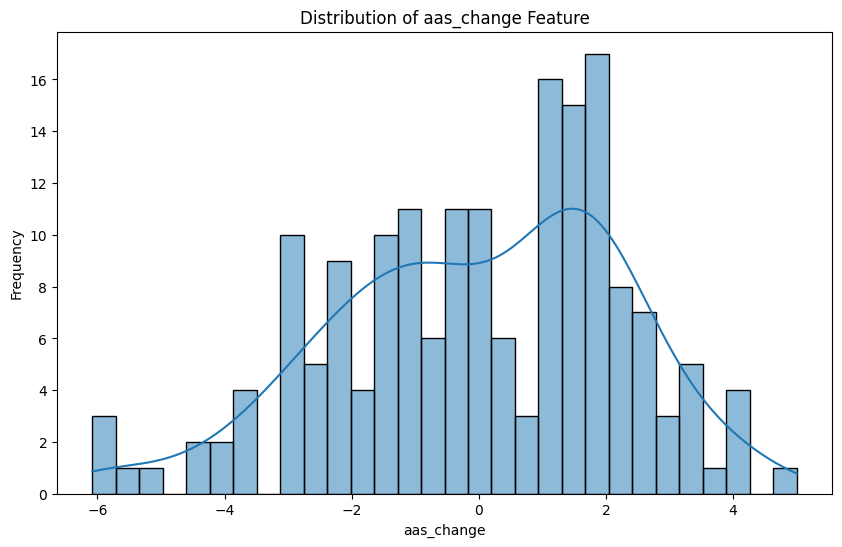

In [255]:
plt.figure(figsize=(10,6))
sns.histplot(df['aas_change'].dropna(), kde=True, bins=30)
plt.title('Distribution of aas_change Feature')
plt.xlabel('aas_change')
plt.ylabel('Frequency')
plt.show()


In [256]:
# Handle missing values in the aas_change column by calculating statistical measures (mean, median, and mode)

mean_value = df['aas_change'].mean()
median_value = df['aas_change'].median()
mode_value = df['aas_change'].mode()[0]

print(f"Mean: {mean_value}, Median: {median_value}, Mode: {mode_value}")

# Based on distribution, decide the best method
# Assuming median is chosen due to potential skewness or outliers:

df['aas_change'].fillna(median_value, inplace=True)


Mean: -0.01939656521590908, Median: 0.100503199, Mode: 1.80574429


<ipython-input-256-692c201a025b>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['aas_change'].fillna(median_value, inplace=True)


Remaining missing values in aas_change: 0


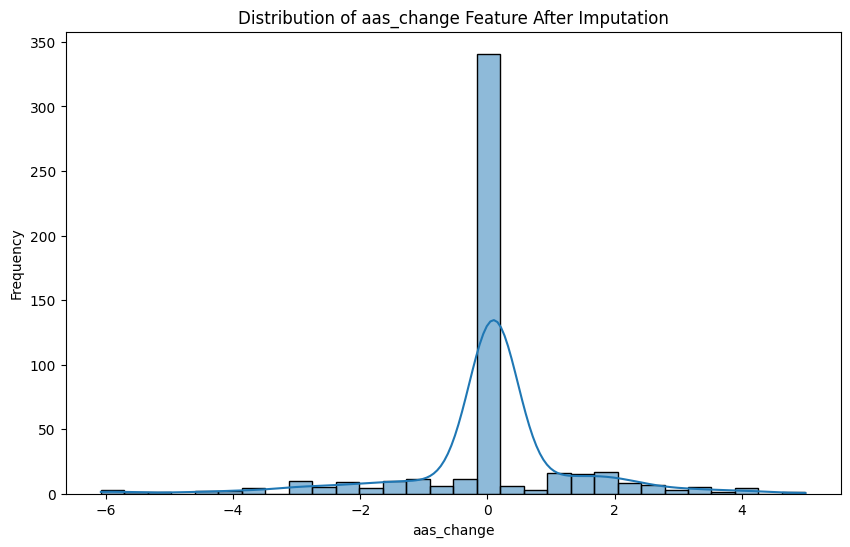

In [257]:
# Check if there are any remaining missing values
print(f"Remaining missing values in aas_change: {df['aas_change'].isnull().sum()}")

# Re-check the distribution after **imputation**
plt.figure(figsize=(10,6))
sns.histplot(df['aas_change'], kde=True, bins=30)
plt.title('Distribution of aas_change Feature After Imputation')
plt.xlabel('aas_change')
plt.ylabel('Frequency')
plt.show()


# **Data Visualization**

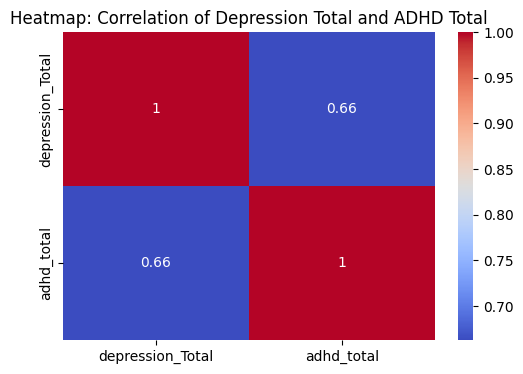

In [258]:
#Heatmap: Correlation of depression_Total with target and other variables

corr_matrix = df[['depression_Total', 'adhd_total']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Heatmap: Correlation of Depression Total and ADHD Total')
plt.show()

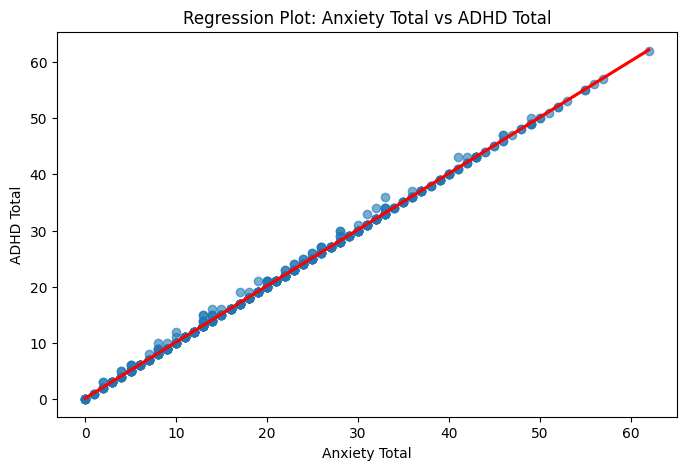

In [259]:
#Regression Plot: Anexity_total vs adhd_total

plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='Anexity_total', y='adhd_total', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Regression Plot: Anxiety Total vs ADHD Total')
plt.xlabel('Anxiety Total')
plt.ylabel('ADHD Total')
plt.show()

<ipython-input-260-52e925b8f9c9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Previous_state', y='adhd_total', palette='pastel')


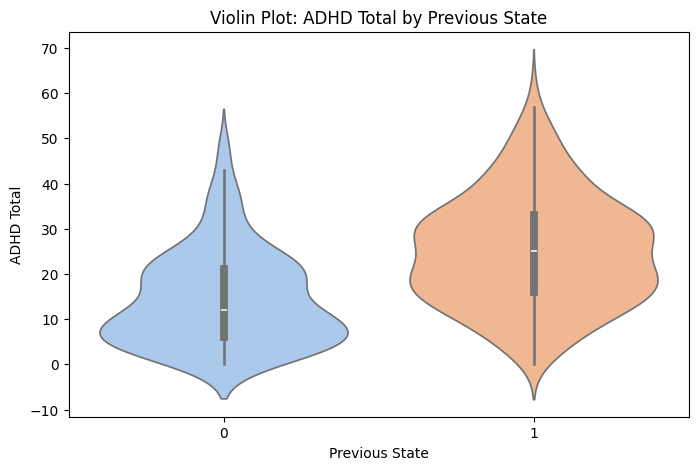

In [260]:
#Violin Plot: Previous_state vs adhd_total - distribution of ADHD Total scores for a specific Previous_state category.
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Previous_state', y='adhd_total', palette='pastel')
plt.title('Violin Plot: ADHD Total by Previous State')
plt.xlabel('Previous State')
plt.ylabel('ADHD Total')
plt.show()

#A violin plot combines a *box plot and a *kernel density estimate (KDE). It shows:
#The distribution (shape) of adhd_total scores for each category of Previous_state.
#The median and interquartile range (from the box plot inside the violin).

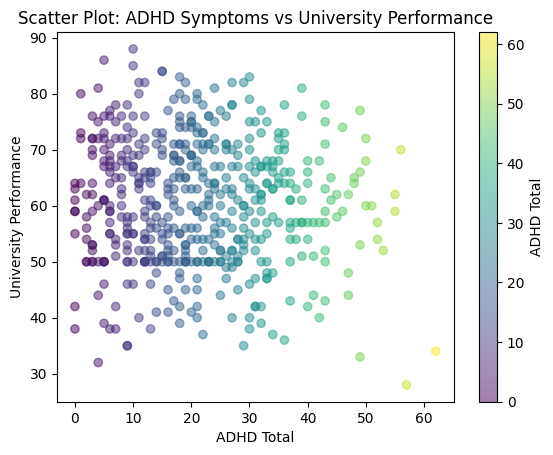

In [261]:
plt.scatter(df['adhd_total'], df['University_Performance'], c=df['adhd_total'], cmap='viridis', alpha=0.5)
plt.title('Scatter Plot: ADHD Symptoms vs University Performance')
plt.xlabel('ADHD Total')
plt.ylabel('University Performance')
plt.colorbar(label='ADHD Total')  # Add a color bar to show the range
plt.show()

#A scatter plot displays individual data points as dots on a 2D graph, helping visualize the relationship between two variables.

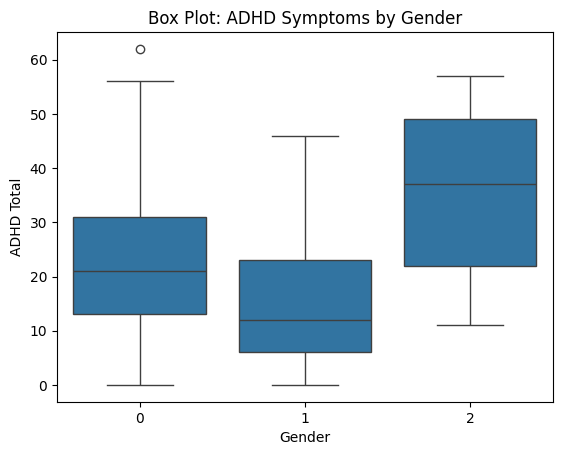

In [262]:
sns.boxplot(data=df, x='sex', y='adhd_total')
plt.title('Box Plot: ADHD Symptoms by Gender')
plt.xlabel('Gender')
plt.ylabel('ADHD Total')
plt.show()

#box plot to visualize the distribution of ADHD total scores (adhd_total) across different gender categories (sex).


#Data Mining



In [263]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)


                             age       sex  Previous_state  depression_Total  \
age                     1.000000  0.162463       -0.024330         -0.038343   
sex                     0.162463  1.000000       -0.062144         -0.004539   
Previous_state         -0.024330 -0.062144        1.000000          0.363586   
depression_Total       -0.038343 -0.004539        0.363586          1.000000   
Alcohol_total           0.035875  0.158202        0.161927          0.107224   
aas1_total              0.139144 -0.004444       -0.019497         -0.239370   
University_Performance  0.073696 -0.113325        0.031413         -0.157426   
HighSchool_performance -0.004590 -0.043795       -0.000260         -0.152833   
Anexity_total           0.007875 -0.086025        0.402591          0.661001   
adhd_total              0.006853 -0.086659        0.403732          0.662408   
aas_change              0.036290  0.023988       -0.025181         -0.185843   

                        Alcohol_total  

In [264]:
# Extract correlations with 'adhd_total'
adhd_correlation = correlation_matrix['adhd_total'].sort_values(ascending=False)

# Display the correlations
print(adhd_correlation)

# 1 - positive correlation (as one variable increases, the other increases).
# -1 -  negative correlation (as one variable increases, the other decreases).
# 0 - no linear correlation (no predictable relationship).

adhd_total                1.000000
Anexity_total             0.999429
depression_Total          0.662408
Previous_state            0.403732
Alcohol_total             0.103437
age                       0.006853
HighSchool_performance   -0.039439
aas_change               -0.041142
University_Performance   -0.063407
sex                      -0.086659
aas1_total               -0.127417
Name: adhd_total, dtype: float64


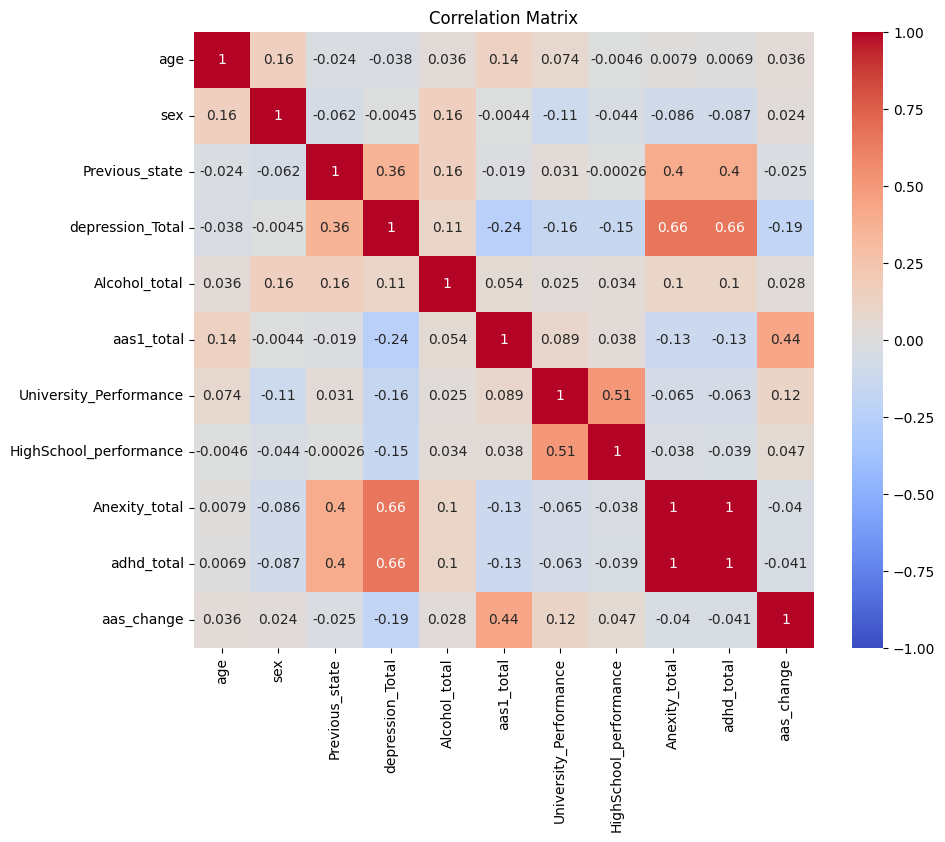

In [265]:
plt.figure(figsize=(10, 8))

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Matrix')
plt.show()


<ipython-input-266-a7029289aa8a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=adhd_correlation.index, y=adhd_correlation.values, palette='coolwarm')


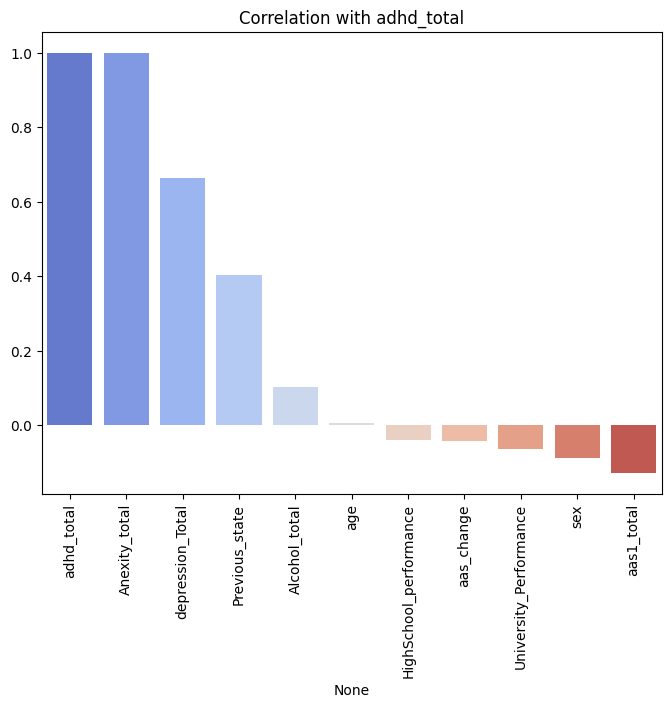

In [266]:
plt.figure(figsize=(8, 6))

#bar plot that visualizes the correlation values between the adhd_total variable and all other numerical variables
sns.barplot(x=adhd_correlation.index, y=adhd_correlation.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Correlation with adhd_total')
plt.show()


##Spliting data

In [267]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['adhd_total'])
y = df['adhd_total']  # Target

# Split the data 20% testing, and 80% training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [268]:
#to standardize the features before training the models.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [269]:
#Check for NaN values in y_train
print(pd.isnull(y_train).sum())


1


In [270]:
#Remove rows with missing y_train
valid_indices = ~pd.isnull(y_train)
X_train = X_train[valid_indices]
y_train = y_train[valid_indices]


In [271]:
#Impute missing values in y_train

y_train = y_train.fillna(y_train.mean())
print(pd.isnull(y_train).sum())


0


# **Model Training and Evaluation**

In [272]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate accuracy metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

results_df = pd.DataFrame(results).T
print(results_df)

                               MSE       MAE        R2
Linear Regression         0.173526  0.238437  0.998798
Decision Tree             0.480392  0.323529  0.996673
Random Forest             0.264483  0.328922  0.998168
Support Vector Regressor  5.421859  1.648062  0.962453
Gradient Boosting         0.244531  0.300791  0.998307


In [273]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Define scoring metrics
scoring = {
    'MSE': make_scorer(mean_squared_error, greater_is_better=False), # Lower is better
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),  # Lower is better
    'R2': make_scorer(r2_score) #higher is better
}

### Performing Cross-Validation

In [274]:
# Perform K-fold cross-validation with K=5) - training data (X_train, y_train) will be split into 5 equal parts / 1 - testing, 4 -training / process is repeated 5 times

results = {}
for name, model in models.items():
    mse_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=scoring['MSE'])
    mae_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=scoring['MAE'])
    r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=scoring['R2'])

    # Calculate mean and standard deviation of the scores
    mean_mse = -np.mean(mse_scores)
    mean_mae = -np.mean(mae_scores)
    mean_r2 = np.mean(r2_scores)

    results[name] = {'MSE': mean_mse, 'MAE': mean_mae, 'R2': mean_r2}

results_df = pd.DataFrame(results).T
print(results_df)

                                MSE       MAE        R2
Linear Regression          0.195242  0.269938  0.998781
Decision Tree              0.891142  0.422191  0.994706
Random Forest              0.512445  0.404164  0.996982
Support Vector Regressor  10.403833  2.331695  0.937848
Gradient Boosting          0.370889  0.345075  0.997774


In [275]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Loop through models to train and evaluate
for name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on both training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate errors (MSE, MAE, R2) for both training and test data
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print results
    print(f'{name} - Training MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')
    print(f'{name} - Training MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}')
    print(f'{name} - Training R2: {train_r2:.4f}, Test R2: {test_r2:.4f}')
    print()

    # Check for overfitting
    if train_mse < test_mse and train_mae < test_mae:
        print(f"{name} seems to be overfitting!")
    else:
        print(f"{name} does not seem to be overfitting.")
    print()


Linear Regression - Training MSE: 0.1854, Test MSE: 0.1735
Linear Regression - Training MAE: 0.2656, Test MAE: 0.2384
Linear Regression - Training R2: 0.9989, Test R2: 0.9988

Linear Regression does not seem to be overfitting.

Decision Tree - Training MSE: 0.0000, Test MSE: 0.4804
Decision Tree - Training MAE: 0.0000, Test MAE: 0.3235
Decision Tree - Training R2: 1.0000, Test R2: 0.9967

Decision Tree seems to be overfitting!

Random Forest - Training MSE: 0.0673, Test MSE: 0.2645
Random Forest - Training MAE: 0.1420, Test MAE: 0.3289
Random Forest - Training R2: 0.9996, Test R2: 0.9982

Random Forest seems to be overfitting!

Support Vector Regressor - Training MSE: 5.3128, Test MSE: 5.4219
Support Vector Regressor - Training MAE: 1.5915, Test MAE: 1.6481
Support Vector Regressor - Training R2: 0.9681, Test R2: 0.9625

Support Vector Regressor seems to be overfitting!

Gradient Boosting - Training MSE: 0.0899, Test MSE: 0.2445
Gradient Boosting - Training MAE: 0.1908, Test MAE: 0.300

In [276]:
best_model = max(results, key=lambda x: results[x]['R2'])
print(f'The best model is: {best_model} with R2 = {results[best_model]["R2"]:.4f}')


The best model is: Linear Regression with R2 = 0.9988


In [277]:
# Assume 'best_model_name' is the name of the best-performing model
best_model_name = max(results, key=lambda x: results[x]['R2'])
best_model = models[best_model_name]

best_model.fit(X_train, y_train)

LinearRegression()

### Model Evaluation and Prediction

In [278]:
# Select a single instance from the test set
test_instance = X_test.iloc[0, :].values.reshape(1, -1)  # Reshape for prediction
actual_adhd_score = y_test.iloc[0]  # Actual ADHD score for this instance

# Display the selected instance
print(f"Selected Test Instance: {X_test.iloc[0, :]}")

print(f"Actual ADHD Score: {actual_adhd_score}")


Selected Test Instance: age                       19.000000
sex                        0.000000
Previous_state             1.000000
depression_Total          16.000000
Alcohol_total              4.000000
aas1_total                33.000000
University_Performance    36.000000
HighSchool_performance    69.000000
Anexity_total             36.000000
aas_change                 0.100503
Name: 173, dtype: float64
Actual ADHD Score: 36.0


In [279]:
# Predict ADHD score for the selected instance
predicted_adhd_score = best_model.predict(test_instance)

# Display the prediction
print(f"Predicted ADHD Score: {predicted_adhd_score[0]:.2f}")


Predicted ADHD Score: 36.03


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [280]:
print(f"Actual ADHD Score: {actual_adhd_score}")
print(f"Predicted ADHD Score: {predicted_adhd_score[0]:.2f}")

# Calculate the absolute error
error = abs(predicted_adhd_score[0] - actual_adhd_score)
print(f"Prediction Error: {error:.2f}")


Actual ADHD Score: 36.0
Predicted ADHD Score: 36.03
Prediction Error: 0.03


In [281]:
# Assuming 'best_model' is your trained model
# Save the model to a .pkl file
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Model saved as best_model.pkl")


Model saved as best_model.pkl


# **Model Deployment**

In [282]:
!pip install gradio

In [283]:
import gradio as gr
import numpy as np

# Assuming 'best_model' is your trained model

def predict_adhd_score(age, sex, previous_state, depression_total, alcohol_total,
                       aas1_total, university_performance, high_school_performance, anxiety_total,
                       aas_change):
    # Prepare input data
    input_data = np.array([[age, sex, previous_state, depression_total, alcohol_total,
                       aas1_total, university_performance, high_school_performance, anxiety_total,
                       aas_change]])

    # Predict ADHD score
    adhd_score = best_model.predict(input_data)
    return f"Predicted ADHD Score: {adhd_score[0]:.2f}"

# Create Gradio interface
iface = gr.Interface(
    fn=predict_adhd_score,
    inputs=[
        gr.components.Number(label="Age"),
        gr.components.Radio(choices=[0, 1], label="Sex (0=Female, 1=Male)"),
        gr.components.Radio(choices=[0, 1], label="Previous State (0=No, 1=Yes)"),
        gr.components.Number(label="Depression Total"),
        gr.components.Number(label="Alcohol Total"),
        gr.components.Number(label="AAS1 Total"),
        gr.components.Number(label="University Performance"),
        gr.components.Number(label="High School Performance"),
        gr.components.Number(label="Anxiety Total"),
        gr.components.Number(label="AAS Change"),

    ],
    outputs="text",
    title="ADHD Score Predictor"
)

# Launch the interface
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a36930e08c9c959487.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
